### The goal is to leverage historical financial and operational data to develop predictive models that forecast key aspects of working capital, such as:

Days Sales Outstanding (DSO): How long it takes to collect receivables.
Days Payables Outstanding (DPO): How long it takes to pay suppliers.
Inventory Turnover: How quickly inventory is sold and replaced.
Cash Flow: Predicting future cash inflows and outflows.
By accurately forecasting these metrics, businesses can make better-informed decisions to streamline operations, improve cash flow, and reduce the cost of capital.

We have First Create an database In MysqlBenchwork where we have create dTbales of each of the dataset.And here we are going to connect the database and saving the CSv files in the databse.

# First we are going to install a nd create engine so we can connect the database.

In [1]:
pip install pandas

In [2]:
pip install pandas sqlalchemy mysql-connector-python

In [3]:
import pandas as pd

## Now we will be loading files into dataframes

In [4]:
sales_df = pd.read_csv('Working Capital Optimisaton/Sales_Dummy_Data.csv')
inventory_df = pd.read_csv('Working Capital Optimisaton/inventory_dummy_data.csv')
accounts_receivable_df = pd.read_csv('Working Capital Optimisaton/dummy_account_receivable_data.csv')
cash_flow_df = pd.read_csv('Working Capital Optimisaton/cash_flow_dummy_data.csv')
accounts_payable_df = pd.read_csv('Working Capital Optimisaton/Accounts_Payable_Dummy_Data.csv')

In [5]:
from sqlalchemy import create_engine, inspect

In [6]:
# Replace with your actual database credentials
username = 'mysql.infoschema'
password = 'Jashshah1999'
host = 'localhost'
database = 'WorkingCapitalOptimization'

In [7]:
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

In [8]:
# Helper function to upload DataFrames to SQL tables with error handling
def upload_to_sql(df, table_name):
    try:
        if inspect(engine).has_table(table_name):
            df.to_sql(table_name, con=engine, if_exists='append', index=False)
        else:
            df.to_sql(table_name, con=engine, if_exists='replace', index=False)
        print(f"{table_name} table uploaded successfully.")
    except Exception as e:
        print(f"Error uploading {table_name} table: {e}")

## Uploading The Dataframes we have created above to the Sql Tables

In [9]:
upload_to_sql(sales_df, 'Sales')
upload_to_sql(inventory_df, 'Inventory')
upload_to_sql(accounts_receivable_df, 'AccountsReceivable')
upload_to_sql(cash_flow_df, 'CashFlow')
upload_to_sql(accounts_payable_df, 'AccountsPayable')

print("Data successfully uploaded to the database.")

Sales table uploaded successfully.
Inventory table uploaded successfully.
AccountsReceivable table uploaded successfully.
CashFlow table uploaded successfully.
AccountsPayable table uploaded successfully.
Data successfully uploaded to the database.


## After this we Run some queries on mysql to learn more about the data on sql and can perform many queries such as INSERT,UPDATE,DELETE.

## Now Carefully we will get details about our dataset


In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleID         1000 non-null   object 
 1   CustomerID     1000 non-null   object 
 2   SaleDate       1000 non-null   object 
 3   SaleAmount     1000 non-null   int64  
 4   ProductID      1000 non-null   object 
 5   QuantitySold   1000 non-null   int64  
 6   UnitPrice      1000 non-null   float64
 7   TotalValue     1000 non-null   float64
 8   PaymentMethod  1000 non-null   object 
 9   SaleStatus     1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [11]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ItemID            1000 non-null   object 
 1   ItemName          1000 non-null   object 
 2   Category          1000 non-null   object 
 3   QuantityOnHand    1000 non-null   int64  
 4   ReorderLevel      1000 non-null   int64  
 5   ReorderQuantity   1000 non-null   int64  
 6   UnitPrice         1000 non-null   float64
 7   SupplierID        1000 non-null   object 
 8   LastOrderDate     1000 non-null   object 
 9   LastReceivedDate  1000 non-null   object 
 10  ExpirationDate    1000 non-null   object 
 11  Location          1000 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 93.9+ KB


In [12]:
accounts_receivable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     1000 non-null   object 
 1   Invoice Date    1000 non-null   object 
 2   Invoice Amount  1000 non-null   float64
 3   Due Date        1000 non-null   object 
 4   Payment Date    803 non-null    object 
 5   Payment Amount  1000 non-null   float64
 6   Payment Terms   1000 non-null   object 
 7   Invoice Status  1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [13]:
cash_flow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    1000 non-null   object
 1   TransactionDate  1000 non-null   object
 2   TransactionType  1000 non-null   object
 3   Amount           1000 non-null   int64 
 4   Category         1000 non-null   object
 5   Description      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [14]:
accounts_payable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   InvoiceNumber  1000 non-null   object
 1   SupplierID     1000 non-null   object
 2   InvoiceDate    1000 non-null   object
 3   InvoiceAmount  1000 non-null   int64 
 4   DueDate        1000 non-null   object
 5   PaymentDate    1000 non-null   object
 6   PaymentAmount  1000 non-null   int64 
 7   PaymentTerms   1000 non-null   object
 8   InvoiceStatus  1000 non-null   object
 9   DaysToPay      1000 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


## Now after carefully Looking and understanding our dataset,we will merge the data into single dataframe with respect to primary and foriegn key and using joins as our scope of the project is to leverage historical financial and operational data which needs a systematic data for the analysis.


In [15]:
merged_df = pd.merge(sales_df, accounts_receivable_df, left_on='CustomerID', right_on='Customer ID', how='left')

In [16]:
# Merge with Inventory on ProductID
merged_df = pd.merge(merged_df, inventory_df, left_on='ProductID', right_on='ItemID', how='left')

In [17]:
# Merge with AccountsPayable on SupplierID
merged_df = pd.merge(merged_df, accounts_payable_df, left_on='SupplierID', right_on='SupplierID', how='left')

In [18]:
# Assuming you want to combine by matching dates
merged_df = pd.merge(merged_df, cash_flow_df, left_on='SaleDate', right_on='TransactionDate', how='left')

In [19]:
merged_df

,SaleID,CustomerID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice_x,TotalValue,PaymentMethod,SaleStatus,...,PaymentAmount,PaymentTerms,InvoiceStatus,DaysToPay,TransactionID,TransactionDate,TransactionType,Amount,Category_y,Description
0,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
1,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
2,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
3,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
4,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10031,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10032,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10033,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531


In [20]:
merged_df.to_csv('/Users/jashshah/Desktop/Working capital Optimisation/merged_data.csv', index=False)


In [21]:
merged_df

,SaleID,CustomerID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice_x,TotalValue,PaymentMethod,SaleStatus,...,PaymentAmount,PaymentTerms,InvoiceStatus,DaysToPay,TransactionID,TransactionDate,TransactionType,Amount,Category_y,Description
0,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
1,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
2,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
3,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
4,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10031,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10032,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10033,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531


In [22]:
merged_df.tail()

,SaleID,CustomerID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice_x,TotalValue,PaymentMethod,SaleStatus,...,PaymentAmount,PaymentTerms,InvoiceStatus,DaysToPay,TransactionID,TransactionDate,TransactionType,Amount,Category_y,Description
10030,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10031,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10032,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10033,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10034,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,NaN,NaN,NaN,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531


In [23]:
merged_df=merged_df.dropna(axis=1,how='all')

In [24]:
merged_df

,SaleID,CustomerID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice_x,TotalValue,PaymentMethod,SaleStatus,...,Payment Date,Payment Amount,Payment Terms,Invoice Status,TransactionID,TransactionDate,TransactionType,Amount,Category_y,Description
0,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,2023-01-31 15:30:04,9834.13,Net 90,Paid,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
1,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,2023-03-04 03:35:22,4995.15,Net 60,Paid,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
2,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,2023-08-27 19:38:12,9134.91,Net 30,Paid,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
3,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,2023-11-20 20:19:08,3868.08,Net 30,Paid,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
4,SALE00240,CUST056,2023-08-28,13036,PROD0356,49,245.15,12012.35,Credit Card,Pending,...,NaN,2262.01,Net 90,Paid,TXN00240,2023-08-28,Cash Outflow,2548,Investing Activities,Transaction 240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,2023-06-19 22:09:42,5478.45,Net 30,Outstanding,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10031,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,2023-04-23 20:29:28,2002.77,Net 60,Outstanding,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10032,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,6863.38,Net 90,Outstanding,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531
10033,SALE00531,CUST093,2024-06-14,6019,PROD0497,37,379.58,14044.46,Credit Card,Pending,...,NaN,5794.91,Net 30,Paid,TXN00531,2024-06-14,Cash Inflow,5975,Financing Activities,Transaction 531


In [25]:
merged_df.to_csv('/Users/jashshah/Desktop/Working capital Optimisation/merged_data.csv', index=False)

## we can see that there are multiple entries os similar SALEID or CUSTOMERID  or different columns,so the next step is to aggregate the data by SALEID,this pricess will make each entry unique.

In [26]:
#Aggregate data by SaleID
aggregated_df = merged_df.groupby('SaleID').agg({
    'CustomerID': 'first',
    'SaleDate': 'first',
    'SaleAmount': 'sum',
    'ProductID': 'first',
    'QuantitySold': 'sum', 
    'UnitPrice_x': 'first',
    'TotalValue': 'sum',
    'PaymentMethod': 'first',
    'SaleStatus': 'first',
    'Customer ID': 'first',
    'Invoice Date': 'first',
    'Invoice Amount': 'sum',
    'Due Date': 'first',
    'Payment Date': 'first',
    'Payment Amount': 'sum',
    'Payment Terms': 'first',
    'Invoice Status': 'first',
    'TransactionID': 'first',
    'TransactionDate': 'first',
    'TransactionType': 'first',
    'Amount': 'sum',
    'Category_y': 'first',
    'Description': 'first'
}).reset_index()

In [27]:
aggregated_df

,SaleID,CustomerID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice_x,TotalValue,PaymentMethod,SaleStatus,...,Payment Date,Payment Amount,Payment Terms,Invoice Status,TransactionID,TransactionDate,TransactionType,Amount,Category_y,Description
0,SALE00001,CUST010,2023-01-01,73700,PROD0165,100,95.14,9514.00,Credit Card,Pending,...,2023-01-30 05:16:10,65133.63,Net 60,Paid,TXN00001,2023-01-01,Cash Inflow,153370,Investing Activities,Transaction 1
1,SALE00002,CUST044,2023-01-02,5760,PROD0027,114,387.72,44200.08,Bank Transfer,Completed,...,2023-09-10 09:54:40,23899.73,Net 30,Outstanding,TXN00002,2023-01-02,Cash Outflow,46872,Investing Activities,Transaction 2
2,SALE00003,CUST011,2023-01-03,43920,PROD0311,136,474.18,64488.48,Credit Card,Pending,...,2023-05-25 02:32:13,31996.71,Net 60,Paid,TXN00003,2023-01-03,Cash Inflow,46560,Operating Activities,Transaction 3
3,SALE00004,CUST079,2023-01-04,81108,PROD0500,126,91.53,11532.78,Bank Transfer,Pending,...,2023-01-24 01:12:20,20850.58,Net 60,Paid,TXN00004,2023-01-04,Cash Inflow,82296,Financing Activities,Transaction 4
4,SALE00005,CUST080,2023-01-05,47619,PROD0285,126,387.78,48860.28,Credit Card,Completed,...,2023-04-18 00:34:45,53505.47,Net 30,Paid,TXN00005,2023-01-05,Cash Inflow,29511,Operating Activities,Transaction 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SALE00996,CUST052,2025-09-22,58320,PROD0259,240,186.59,44781.60,Cash,Completed,...,2023-03-09 14:28:10,54755.14,Net 90,Outstanding,TXN00996,2025-09-22,Cash Inflow,11648,Investing Activities,Transaction 996
996,SALE00997,CUST019,2025-09-23,94120,PROD0373,481,43.57,20957.17,Credit Card,Pending,...,2023-06-30 07:17:48,73103.47,Net 60,Paid,TXN00997,2025-09-23,Cash Inflow,33423,Financing Activities,Transaction 997
997,SALE00998,CUST077,2025-09-24,29888,PROD0355,232,383.95,89076.40,Cash,Pending,...,2023-05-07 14:02:16,47617.90,Net 60,Outstanding,TXN00998,2025-09-24,Cash Outflow,72760,Financing Activities,Transaction 998
998,SALE00999,CUST021,2025-09-25,165240,PROD0225,330,210.07,69323.10,Credit Card,Pending,...,2023-10-16 23:49:10,79997.27,Net 60,Paid,TXN00999,2025-09-25,Cash Outflow,234600,Financing Activities,Transaction 999


In [28]:
aggregated_df.to_csv('/Users/jashshah/Desktop/Working capital Optimisation/aggregated_data.csv', index=False)

#print("Aggregated data saved to //Users/jashshah/Desktop/Working capital Optimisation/aggregated_data.csv")

In [29]:
# Rename columns to remove suffixes
aggregated_df.rename(columns={
    'UnitPrice_x': 'UnitPrice',
    'Category_y': 'Category'
}, inplace=True)

In [30]:
aggregated_df.to_csv('/Users/jashshah/Desktop/Working capital Optimisation/aggregated_data.csv', index=False)

#print("Cleaned aggregated data saved to /Users/jashshah/Desktop/Working capital Optimisation/aggregated_data.csv")

In [31]:
aggregated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SaleID           1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   SaleDate         1000 non-null   object 
 3   SaleAmount       1000 non-null   int64  
 4   ProductID        1000 non-null   object 
 5   QuantitySold     1000 non-null   int64  
 6   UnitPrice        1000 non-null   float64
 7   TotalValue       1000 non-null   float64
 8   PaymentMethod    1000 non-null   object 
 9   SaleStatus       1000 non-null   object 
 10  Customer ID      1000 non-null   object 
 11  Invoice Date     1000 non-null   object 
 12  Invoice Amount   1000 non-null   float64
 13  Due Date         1000 non-null   object 
 14  Payment Date     1000 non-null   object 
 15  Payment Amount   1000 non-null   float64
 16  Payment Terms    1000 non-null   object 
 17  Invoice Status 

## Here we are uploading the Aggregated_df to our database again.

In [32]:
table_name = 'AggregatedSalesData' 
aggregated_df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

print(f"Data uploaded to the table '{table_name}' in the database '{database}'")

Data uploaded to the table 'AggregatedSalesData' in the database 'WorkingCapitalOptimization'


In [33]:
aggregated_df.tail()

,SaleID,CustomerID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice,TotalValue,PaymentMethod,SaleStatus,...,Payment Date,Payment Amount,Payment Terms,Invoice Status,TransactionID,TransactionDate,TransactionType,Amount,Category,Description
995,SALE00996,CUST052,2025-09-22,58320,PROD0259,240,186.59,44781.60,Cash,Completed,...,2023-03-09 14:28:10,54755.14,Net 90,Outstanding,TXN00996,2025-09-22,Cash Inflow,11648,Investing Activities,Transaction 996
996,SALE00997,CUST019,2025-09-23,94120,PROD0373,481,43.57,20957.17,Credit Card,Pending,...,2023-06-30 07:17:48,73103.47,Net 60,Paid,TXN00997,2025-09-23,Cash Inflow,33423,Financing Activities,Transaction 997
997,SALE00998,CUST077,2025-09-24,29888,PROD0355,232,383.95,89076.40,Cash,Pending,...,2023-05-07 14:02:16,47617.90,Net 60,Outstanding,TXN00998,2025-09-24,Cash Outflow,72760,Financing Activities,Transaction 998
998,SALE00999,CUST021,2025-09-25,165240,PROD0225,330,210.07,69323.10,Credit Card,Pending,...,2023-10-16 23:49:10,79997.27,Net 60,Paid,TXN00999,2025-09-25,Cash Outflow,234600,Financing Activities,Transaction 999
999,SALE01000,CUST064,2025-09-26,44181,PROD0152,36,382.03,13753.08,Cash,Pending,...,2023-11-30 07:25:59,45600.70,Net 60,Paid,TXN01000,2025-09-26,Cash Inflow,119727,Operating Activities,Transaction 1000


In [34]:
aggregated_df.drop(columns=['CustomerID'],inplace=True)


In [35]:
aggregated_df

,SaleID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice,TotalValue,PaymentMethod,SaleStatus,Customer ID,...,Payment Date,Payment Amount,Payment Terms,Invoice Status,TransactionID,TransactionDate,TransactionType,Amount,Category,Description
0,SALE00001,2023-01-01,73700,PROD0165,100,95.14,9514.00,Credit Card,Pending,CUST010,...,2023-01-30 05:16:10,65133.63,Net 60,Paid,TXN00001,2023-01-01,Cash Inflow,153370,Investing Activities,Transaction 1
1,SALE00002,2023-01-02,5760,PROD0027,114,387.72,44200.08,Bank Transfer,Completed,CUST044,...,2023-09-10 09:54:40,23899.73,Net 30,Outstanding,TXN00002,2023-01-02,Cash Outflow,46872,Investing Activities,Transaction 2
2,SALE00003,2023-01-03,43920,PROD0311,136,474.18,64488.48,Credit Card,Pending,CUST011,...,2023-05-25 02:32:13,31996.71,Net 60,Paid,TXN00003,2023-01-03,Cash Inflow,46560,Operating Activities,Transaction 3
3,SALE00004,2023-01-04,81108,PROD0500,126,91.53,11532.78,Bank Transfer,Pending,CUST079,...,2023-01-24 01:12:20,20850.58,Net 60,Paid,TXN00004,2023-01-04,Cash Inflow,82296,Financing Activities,Transaction 4
4,SALE00005,2023-01-05,47619,PROD0285,126,387.78,48860.28,Credit Card,Completed,CUST080,...,2023-04-18 00:34:45,53505.47,Net 30,Paid,TXN00005,2023-01-05,Cash Inflow,29511,Operating Activities,Transaction 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SALE00996,2025-09-22,58320,PROD0259,240,186.59,44781.60,Cash,Completed,CUST052,...,2023-03-09 14:28:10,54755.14,Net 90,Outstanding,TXN00996,2025-09-22,Cash Inflow,11648,Investing Activities,Transaction 996
996,SALE00997,2025-09-23,94120,PROD0373,481,43.57,20957.17,Credit Card,Pending,CUST019,...,2023-06-30 07:17:48,73103.47,Net 60,Paid,TXN00997,2025-09-23,Cash Inflow,33423,Financing Activities,Transaction 997
997,SALE00998,2025-09-24,29888,PROD0355,232,383.95,89076.40,Cash,Pending,CUST077,...,2023-05-07 14:02:16,47617.90,Net 60,Outstanding,TXN00998,2025-09-24,Cash Outflow,72760,Financing Activities,Transaction 998
998,SALE00999,2025-09-25,165240,PROD0225,330,210.07,69323.10,Credit Card,Pending,CUST021,...,2023-10-16 23:49:10,79997.27,Net 60,Paid,TXN00999,2025-09-25,Cash Outflow,234600,Financing Activities,Transaction 999


In [36]:
import seaborn as sns

/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [37]:
import numpy as np

In [38]:
import matplotlib as plt

In [39]:
import matplotlib.pyplot as plt

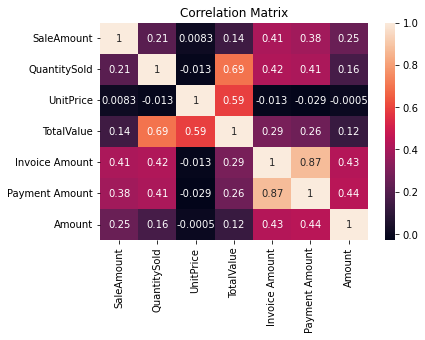

In [40]:
correlation_matrix = aggregated_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [41]:
aggregated_df['TotalAfterDiscount'] = aggregated_df['SaleAmount'] - aggregated_df['Payment Amount']


In [42]:
aggregated_df

,SaleID,SaleDate,SaleAmount,ProductID,QuantitySold,UnitPrice,TotalValue,PaymentMethod,SaleStatus,Customer ID,...,Payment Amount,Payment Terms,Invoice Status,TransactionID,TransactionDate,TransactionType,Amount,Category,Description,TotalAfterDiscount
0,SALE00001,2023-01-01,73700,PROD0165,100,95.14,9514.00,Credit Card,Pending,CUST010,...,65133.63,Net 60,Paid,TXN00001,2023-01-01,Cash Inflow,153370,Investing Activities,Transaction 1,8566.37
1,SALE00002,2023-01-02,5760,PROD0027,114,387.72,44200.08,Bank Transfer,Completed,CUST044,...,23899.73,Net 30,Outstanding,TXN00002,2023-01-02,Cash Outflow,46872,Investing Activities,Transaction 2,-18139.73
2,SALE00003,2023-01-03,43920,PROD0311,136,474.18,64488.48,Credit Card,Pending,CUST011,...,31996.71,Net 60,Paid,TXN00003,2023-01-03,Cash Inflow,46560,Operating Activities,Transaction 3,11923.29
3,SALE00004,2023-01-04,81108,PROD0500,126,91.53,11532.78,Bank Transfer,Pending,CUST079,...,20850.58,Net 60,Paid,TXN00004,2023-01-04,Cash Inflow,82296,Financing Activities,Transaction 4,60257.42
4,SALE00005,2023-01-05,47619,PROD0285,126,387.78,48860.28,Credit Card,Completed,CUST080,...,53505.47,Net 30,Paid,TXN00005,2023-01-05,Cash Inflow,29511,Operating Activities,Transaction 5,-5886.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SALE00996,2025-09-22,58320,PROD0259,240,186.59,44781.60,Cash,Completed,CUST052,...,54755.14,Net 90,Outstanding,TXN00996,2025-09-22,Cash Inflow,11648,Investing Activities,Transaction 996,3564.86
996,SALE00997,2025-09-23,94120,PROD0373,481,43.57,20957.17,Credit Card,Pending,CUST019,...,73103.47,Net 60,Paid,TXN00997,2025-09-23,Cash Inflow,33423,Financing Activities,Transaction 997,21016.53
997,SALE00998,2025-09-24,29888,PROD0355,232,383.95,89076.40,Cash,Pending,CUST077,...,47617.90,Net 60,Outstanding,TXN00998,2025-09-24,Cash Outflow,72760,Financing Activities,Transaction 998,-17729.90
998,SALE00999,2025-09-25,165240,PROD0225,330,210.07,69323.10,Credit Card,Pending,CUST021,...,79997.27,Net 60,Paid,TXN00999,2025-09-25,Cash Outflow,234600,Financing Activities,Transaction 999,85242.73


### Converting the date in date time

In [43]:
import seaborn as sns

In [44]:
aggregated_df['SaleDate']= pd.to_datetime(aggregated_df['SaleDate'])

In [45]:
aggregated_df['Payment Date']= pd.to_datetime(aggregated_df['Payment Date'])

In [46]:
aggregated_df['Invoice Date']= pd.to_datetime(aggregated_df['Invoice Date'])

In [47]:
aggregated_df['Due Date']= pd.to_datetime(aggregated_df['Due Date'])

In [48]:
aggregated_df['TransactionDate']= pd.to_datetime(aggregated_df['TransactionDate'])

In [49]:
aggregated_df.columns.tolist()

['SaleID',
 'SaleDate',
 'SaleAmount',
 'ProductID',
 'QuantitySold',
 'UnitPrice',
 'TotalValue',
 'PaymentMethod',
 'SaleStatus',
 'Customer ID',
 'Invoice Date',
 'Invoice Amount',
 'Due Date',
 'Payment Date',
 'Payment Amount',
 'Payment Terms',
 'Invoice Status',
 'TransactionID',
 'TransactionDate',
 'TransactionType',
 'Amount',
 'Category',
 'Description',
 'TotalAfterDiscount']

### Filtering Relevant Columns

In [50]:
relevant_columns = [
    'SaleID', 'Customer ID', 'SaleDate', 'Invoice Date', 'Payment Date', 'Invoice Amount', 'Payment Amount',
    'Due Date', 'Invoice Amount', 'QuantitySold', 'UnitPrice',
    'TransactionID', 'TransactionDate', 'TransactionType', 'Amount', 'Category', 'Description'
]

filtered_df = aggregated_df[relevant_columns]
print(filtered_df.head())


      SaleID Customer ID   SaleDate        Invoice Date        Payment Date  \
0  SALE00001     CUST010 2023-01-01 2023-09-01 22:54:21 2023-01-30 05:16:10   
1  SALE00002     CUST044 2023-01-02 2023-12-11 11:24:07 2023-09-10 09:54:40   
2  SALE00003     CUST011 2023-01-03 2023-07-22 05:12:44 2023-05-25 02:32:13   
3  SALE00004     CUST079 2023-01-04 2023-09-11 04:17:06 2023-01-24 01:12:20   
4  SALE00005     CUST080 2023-01-05 2023-12-05 18:02:18 2023-04-18 00:34:45   

   Invoice Amount  Payment Amount            Due Date  Invoice Amount  \
0        55289.66        65133.63 2023-04-25 17:19:03        55289.66   
1        17892.84        23899.73 2023-09-29 16:08:30        17892.84   
2        38055.71        31996.71 2023-02-25 05:52:24        38055.71   
3        26711.42        20850.58 2023-07-19 22:43:21        26711.42   
4        54176.76        53505.47 2023-11-05 19:18:59        54176.76   

   QuantitySold  UnitPrice TransactionID TransactionDate TransactionType  \
0         

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
filtered_df['SaleDate'] = filtered_df['SaleDate'].dt.date
filtered_df['Invoice Date'] = filtered_df['Invoice Date'].dt.date
filtered_df['Payment Date'] = filtered_df['Payment Date'].dt.date
filtered_df['Due Date'] = filtered_df['Due Date'].dt.date
filtered_df['TransactionDate'] = filtered_df['TransactionDate'].dt.date
print(filtered_df.head())



      SaleID Customer ID    SaleDate Invoice Date Payment Date  \
0  SALE00001     CUST010  2023-01-01   2023-09-01   2023-01-30   
1  SALE00002     CUST044  2023-01-02   2023-12-11   2023-09-10   
2  SALE00003     CUST011  2023-01-03   2023-07-22   2023-05-25   
3  SALE00004     CUST079  2023-01-04   2023-09-11   2023-01-24   
4  SALE00005     CUST080  2023-01-05   2023-12-05   2023-04-18   

   Invoice Amount  Payment Amount    Due Date  Invoice Amount  QuantitySold  \
0        55289.66        65133.63  2023-04-25        55289.66           100   
1        17892.84        23899.73  2023-09-29        17892.84           114   
2        38055.71        31996.71  2023-02-25        38055.71           136   
3        26711.42        20850.58  2023-07-19        26711.42           126   
4        54176.76        53505.47  2023-11-05        54176.76           126   

   UnitPrice TransactionID TransactionDate TransactionType  Amount  \
0      95.14      TXN00001      2023-01-01     Cash Inflow

In [53]:
filtered_df = filtered_df.loc[:,~filtered_df.columns.duplicated()]

In [54]:
filtered_df

,SaleID,Customer ID,SaleDate,Invoice Date,Payment Date,Invoice Amount,Payment Amount,Due Date,QuantitySold,UnitPrice,TransactionID,TransactionDate,TransactionType,Amount,Category,Description
0,SALE00001,CUST010,2023-01-01,2023-09-01,2023-01-30,55289.66,65133.63,2023-04-25,100,95.14,TXN00001,2023-01-01,Cash Inflow,153370,Investing Activities,Transaction 1
1,SALE00002,CUST044,2023-01-02,2023-12-11,2023-09-10,17892.84,23899.73,2023-09-29,114,387.72,TXN00002,2023-01-02,Cash Outflow,46872,Investing Activities,Transaction 2
2,SALE00003,CUST011,2023-01-03,2023-07-22,2023-05-25,38055.71,31996.71,2023-02-25,136,474.18,TXN00003,2023-01-03,Cash Inflow,46560,Operating Activities,Transaction 3
3,SALE00004,CUST079,2023-01-04,2023-09-11,2023-01-24,26711.42,20850.58,2023-07-19,126,91.53,TXN00004,2023-01-04,Cash Inflow,82296,Financing Activities,Transaction 4
4,SALE00005,CUST080,2023-01-05,2023-12-05,2023-04-18,54176.76,53505.47,2023-11-05,126,387.78,TXN00005,2023-01-05,Cash Inflow,29511,Operating Activities,Transaction 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SALE00996,CUST052,2025-09-22,2023-07-28,2023-03-09,55221.17,54755.14,2023-04-17,240,186.59,TXN00996,2025-09-22,Cash Inflow,11648,Investing Activities,Transaction 996
996,SALE00997,CUST019,2025-09-23,2023-06-27,2023-06-30,60683.57,73103.47,2023-03-04,481,43.57,TXN00997,2025-09-23,Cash Inflow,33423,Financing Activities,Transaction 997
997,SALE00998,CUST077,2025-09-24,2023-03-13,2023-05-07,54351.72,47617.90,2023-08-06,232,383.95,TXN00998,2025-09-24,Cash Outflow,72760,Financing Activities,Transaction 998
998,SALE00999,CUST021,2025-09-25,2023-04-02,2023-10-16,89729.16,79997.27,2023-07-09,330,210.07,TXN00999,2025-09-25,Cash Outflow,234600,Financing Activities,Transaction 999


In [55]:
filtered_df.to_csv('/Users/jashshah/Desktop/Working capital Optimisation/cleaned_aggregated_data.csv', index=False)


# Days Sales Outstanding (DSO)

In [56]:
filtered_df['DaysToCollect'] = (pd.to_datetime(filtered_df['Payment Date']) - pd.to_datetime(filtered_df['Invoice Date'])).dt.days
dso = filtered_df.groupby('Customer ID')['DaysToCollect'].mean().reset_index()


# Days Payables Outstanding (DPO)

In [57]:
filtered_df['DaysToPay'] = (pd.to_datetime(filtered_df['Payment Date']) - pd.to_datetime(filtered_df['Invoice Date'])).dt.days
dpo = filtered_df.groupby('Customer ID')['DaysToPay'].mean().reset_index()


# Inventory Turnover
 

In [58]:
inventory_turnover = filtered_df.groupby('SaleID')['QuantitySold'].sum().reset_index()
inventory_turnover = inventory_turnover.rename(columns={'QuantitySold': 'InventoryTurnover'})


# Cash Flow

In [59]:
cash_flow = filtered_df.groupby('TransactionDate')['Amount'].sum().reset_index()

In [60]:
top_dso_customers = dso.nlargest(10, 'DaysToCollect')
top_dpo_customers = dpo.nlargest(10, 'DaysToPay')


In [61]:
# Merge the calculated metrics back to the filtered_df for a comprehensive dataset
filtered_df = filtered_df.merge(dso, on='Customer ID', suffixes=('', '_avg_DSO'))
filtered_df = filtered_df.merge(dpo, on='Customer ID', suffixes=('', '_avg_DPO'))
filtered_df = filtered_df.merge(inventory_turnover, on='SaleID', suffixes=('', '_InventoryTurnover'))

# Save the enhanced DataFrame to a CSV file
filtered_df.to_csv('enhanced_data.csv', index=False)

In [78]:
filtered_df.to_csv('/Users/jashshah/Desktop/Working capital Optimisation/enhanced_data.csv', index=False)

In [77]:
filtered_df

,SaleID,Customer ID,SaleDate,Invoice Date,Payment Date,Invoice Amount,Payment Amount,Due Date,QuantitySold,UnitPrice,...,TransactionDate,TransactionType,Amount,Category,Description,DaysToCollect,DaysToPay,DaysToCollect_avg_DSO,DaysToPay_avg_DPO,InventoryTurnover
0,SALE00001,CUST010,2023-01-01,2023-09-01,2023-01-30,55289.66,65133.63,2023-04-25,100,95.14,...,2023-01-01,Cash Inflow,153370,Investing Activities,Transaction 1,-214,-214,-214.0,-214.0,100
1,SALE00121,CUST010,2023-05-01,2023-09-01,2023-01-30,55289.66,65133.63,2023-04-25,170,474.20,...,2023-05-01,Cash Outflow,44000,Investing Activities,Transaction 121,-214,-214,-214.0,-214.0,170
2,SALE00277,CUST010,2023-10-04,2023-09-01,2023-01-30,55289.66,65133.63,2023-04-25,490,292.82,...,2023-10-04,Cash Inflow,195190,Financing Activities,Transaction 277,-214,-214,-214.0,-214.0,490
3,SALE00296,CUST010,2023-10-23,2023-09-01,2023-01-30,55289.66,65133.63,2023-04-25,300,194.08,...,2023-10-23,Cash Outflow,74430,Financing Activities,Transaction 296,-214,-214,-214.0,-214.0,300
4,SALE00323,CUST010,2023-11-19,2023-09-01,2023-01-30,55289.66,65133.63,2023-04-25,330,243.58,...,2023-11-19,Cash Outflow,112890,Investing Activities,Transaction 323,-214,-214,-214.0,-214.0,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SALE00357,CUST009,2023-12-23,2023-04-10,2023-09-28,55430.15,51703.56,2023-08-09,380,398.77,...,2023-12-23,Cash Outflow,134990,Operating Activities,Transaction 357,171,171,171.0,171.0,380
996,SALE00502,CUST009,2024-05-16,2023-04-10,2023-09-28,55430.15,51703.56,2023-08-09,280,307.12,...,2024-05-16,Cash Inflow,150960,Financing Activities,Transaction 502,171,171,171.0,171.0,280
997,SALE00510,CUST009,2024-05-24,2023-04-10,2023-09-28,55430.15,51703.56,2023-08-09,390,69.66,...,2024-05-24,Cash Outflow,133800,Operating Activities,Transaction 510,171,171,171.0,171.0,390
998,SALE00595,CUST009,2024-08-17,2023-04-10,2023-09-28,55430.15,51703.56,2023-08-09,170,465.86,...,2024-08-17,Cash Outflow,172130,Investing Activities,Transaction 595,171,171,171.0,171.0,170


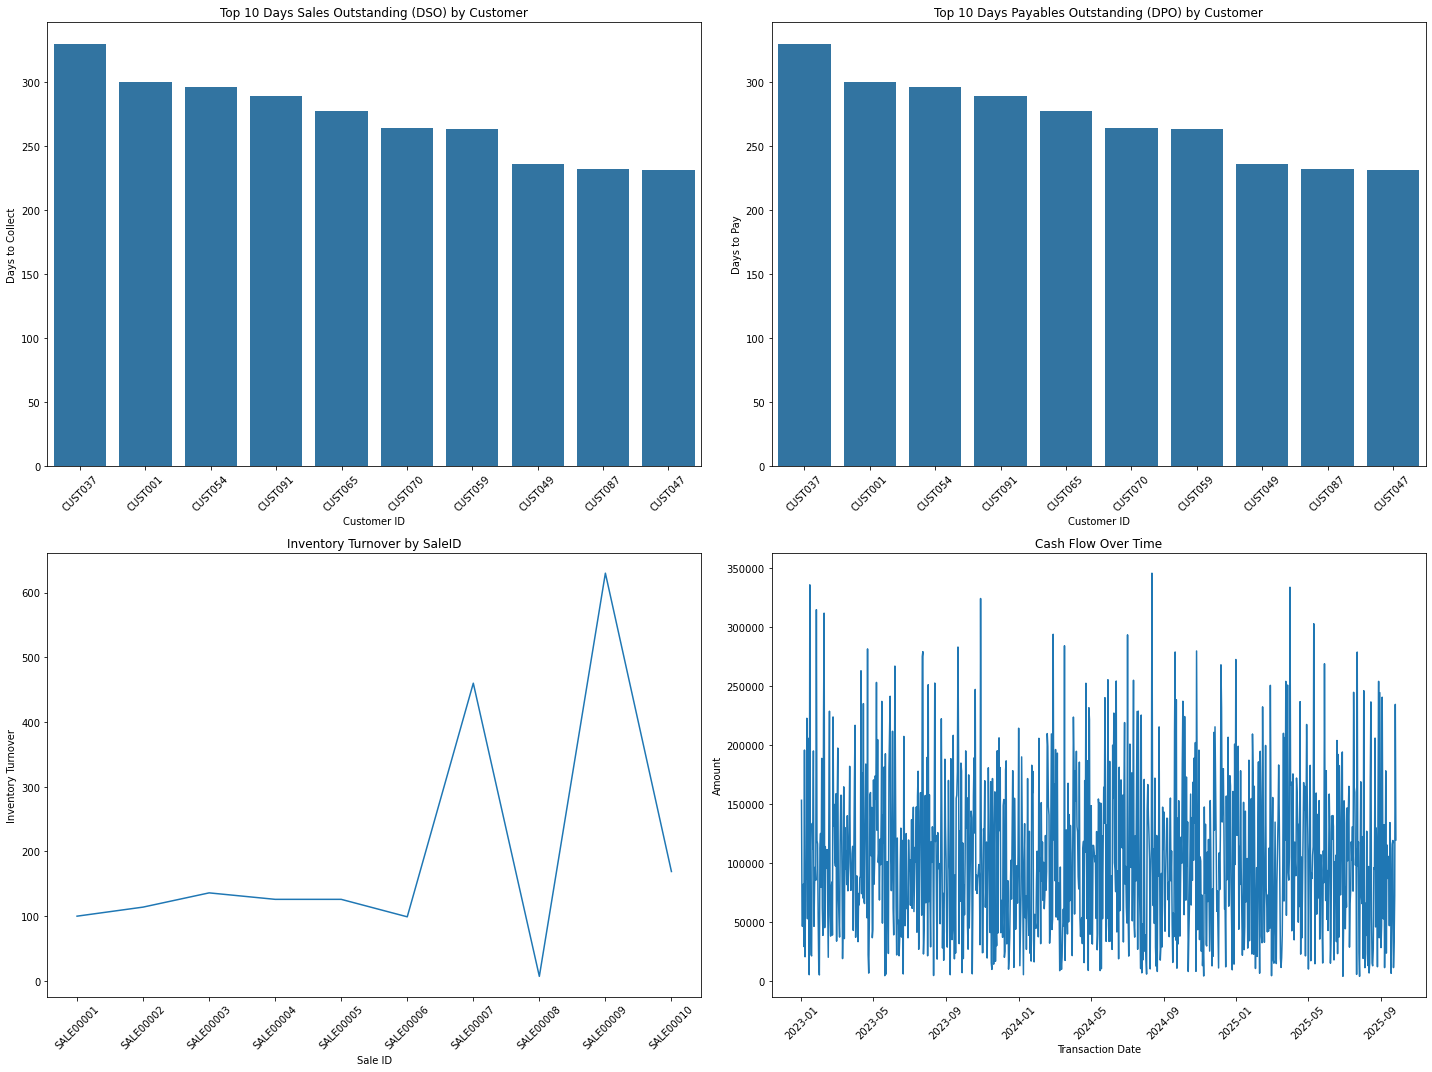

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Days Sales Outstanding (DSO)
sns.barplot(x='Customer ID', y='DaysToCollect', data=top_dso_customers, ax=axs[0, 0])
axs[0, 0].set_title('Top 10 Days Sales Outstanding (DSO) by Customer')
axs[0, 0].set_xlabel('Customer ID')
axs[0, 0].set_ylabel('Days to Collect')
axs[0, 0].tick_params(axis='x', rotation=45)

# Days Payables Outstanding (DPO)
sns.barplot(x='Customer ID', y='DaysToPay', data=top_dpo_customers, ax=axs[0, 1])
axs[0, 1].set_title('Top 10 Days Payables Outstanding (DPO) by Customer')
axs[0, 1].set_xlabel('Customer ID')
axs[0, 1].set_ylabel('Days to Pay')
axs[0, 1].tick_params(axis='x', rotation=45)

# Inventory Turnover 
sns.lineplot(x='SaleID', y='InventoryTurnover', data=inventory_turnover.head(10), ax=axs[1, 0])
axs[1, 0].set_title('Inventory Turnover by SaleID')
axs[1, 0].set_xlabel('Sale ID')
axs[1, 0].set_ylabel('Inventory Turnover')
axs[1, 0].tick_params(axis='x', rotation=45)

# Cash Flow
sns.lineplot(x='TransactionDate', y='Amount', data=cash_flow, ax=axs[1, 1])
axs[1, 1].set_title('Cash Flow Over Time')
axs[1, 1].set_xlabel('Transaction Date')
axs[1, 1].set_ylabel('Amount')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [64]:
filtered_df.dtypes

SaleID                    object
Customer ID               object
SaleDate                  object
Invoice Date              object
Payment Date              object
Invoice Amount           float64
Payment Amount           float64
Due Date                  object
QuantitySold               int64
UnitPrice                float64
TransactionID             object
TransactionDate           object
TransactionType           object
Amount                     int64
Category                  object
Description               object
DaysToCollect              int64
DaysToPay                  int64
DaysToCollect_avg_DSO    float64
DaysToPay_avg_DPO        float64
InventoryTurnover          int64
dtype: object